In [0]:
#%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/home/project/imagerecognition', validation_size = 0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/project/imagerecognition/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/project/imagerecognition/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /home/project/imagerecognition/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /home/project/imagerecognition/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/

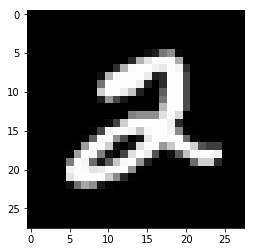

In [3]:
img = mnist.train.images[5]
plt.imshow(img.reshape((28, 28)), cmap = 'Greys_r')

In [6]:
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs = tf.placeholder(tf.float32, (None, image_size))

# Initialize the weight for input by matrix
w1 = tf.Variable(tf.random_normal([image_size, encoding_dim], stddev= 0.5))
b1 = tf.Variable(tf.random_normal([encoding_dim], stddev = 0.1))
# Multplication of input matrix and weight with sigmod activation function
# Sigmoid function outputs in the range (0, 1)
encoded = tf.nn.sigmoid(tf.matmul(inputs, w1) + b1)

w2 = tf.Variable(tf.random_normal([encoding_dim, image_size], stddev = 0.5))
b2 = tf.Variable(tf.random_normal([image_size], stddev = 0.1))

logits = tf.matmul(encoded, w2) + b2
decoded = tf.nn.sigmoid(logits)

loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = inputs, logits = logits))
opt = tf.train.RMSPropOptimizer(0.01).minimize(loss)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
# check the image_size
print(image_size)

784


In [10]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

EPOCH = 30
BATCH_SIZE = 500
for i in range(EPOCH):
    TOTAL_LOST = 0
    for k in range(mnist.train.num_examples // BATCH_SIZE):
        batch = mnist.train.next_batch(BATCH_SIZE)
        batch_cost, _ = sess.run([loss, opt], feed_dict = {inputs: batch[0]})
        TOTAL_LOST += batch_cost
    
    print ('Epoch:' + str(i + 1) + ', loss: ' + str(TOTAL_LOST / (mnist.train.num_examples // BATCH_SIZE) * 1.0))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:1, loss: 0.9320371925830842
Epoch:2, loss: 0.365720792238911
Epoch:3, loss: 0.20157867235442004
Epoch:4, loss: 0.1685850168267886
Epoch:5, loss: 0.15427223990360897
Epoch:6, loss: 0.1463764669994513
Epoch:7, loss: 0.14158438878754775
Epoch:8, loss: 0.13807979027430217
Epoch:9, loss: 0.13534539577861626
Epoch:10, loss: 0.1329035323113203
Epoch:11, loss: 0.13099060182770092
Epoch:12, loss: 0.12916005893299978
Epoch:13, loss: 0.12731684415290753
Epoch:14, loss: 0.1259886628637711
Epoch:15, loss: 0.12469409431020419
Epoch:16, loss: 0.12357944361865521
Epoch:17, loss: 0.12256113632271687
Epoch:18, loss: 0.12165021778394779
Epoch:19, loss: 0.12075824066996574
Epoch:20, loss: 0.12024510198583206
Epoch:21, loss: 0.11953456134845813
Epoch:22, loss: 0.11887252492209276
Epoch:23, loss: 0.11836832519620658
Epoch:24, loss: 0.11792124441514412
Epoch:25, loss: 0.11736691401650508
Epoch:26, loss: 0.11710109058767557
Epoch:27, loss: 0.11673787347972393
Epoch:28, loss: 0.11646863669157029
Epoch:29

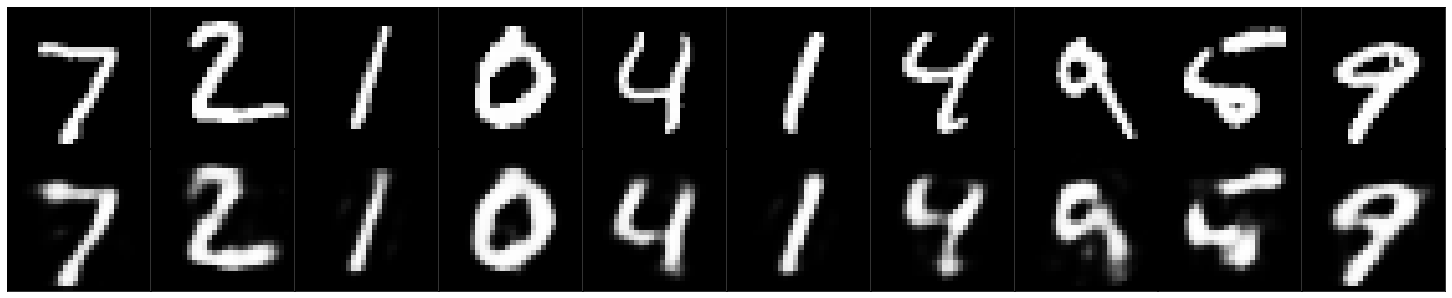

In [12]:
fig, axes = plt.subplots(nrows =2, ncols =10, sharex = True, sharey = True, figsize = (20,4))
in_imgs = mnist.test.images[:10]
reconstructed = sess.run(decoded, feed_dict = {inputs: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap = 'Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


fig.tight_layout(pad = 0.1)